In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import random
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import tkinter as tk
from tkinter import messagebox
import pickle



In [2]:
# Loading the dataset
data = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
# Preprocessing Steps
data = data.dropna()

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


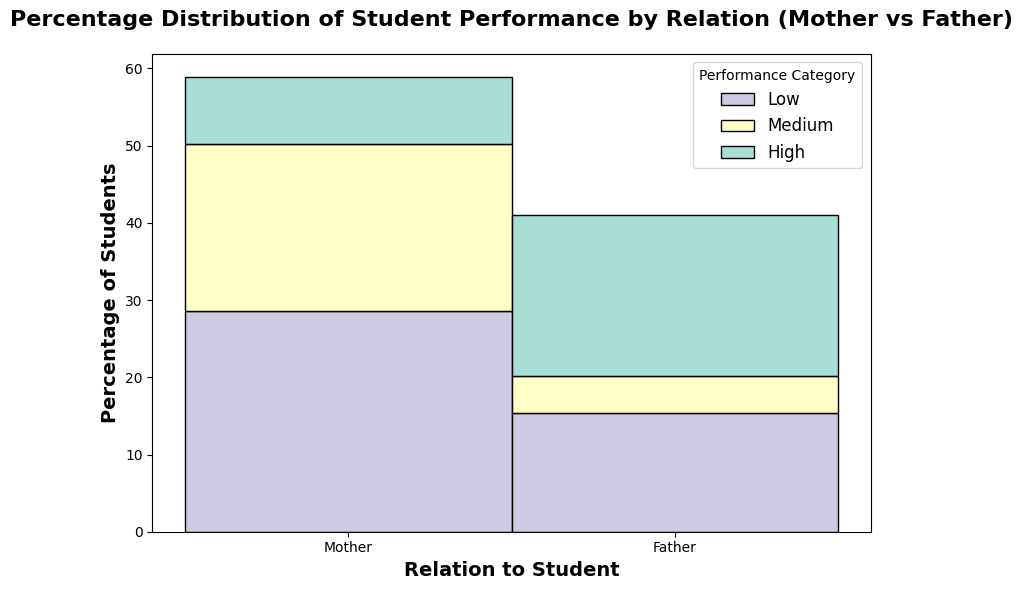

In [4]:
# Mapping numeric values to categorical labels for the 'Relation' column
data['Relation'] = data['Relation'].map({0: 'Mother', 1: 'Father'})

# histogram plot for 'Relation' vs 'Class'
plt.figure(figsize=(8, 6))  

# Normalize the histogram 
sns.histplot(data=data, x="Relation", hue="Class", multiple="stack", kde=False, palette="Set3", stat="percent")

plt.title("Percentage Distribution of Student Performance by Relation (Mother vs Father)", fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Relation to Student", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Students", fontsize=14, fontweight='bold')

plt.legend(title="Performance Category", labels=['Low', 'Medium', 'High'], loc='upper right', fontsize=12)

plt.tight_layout()  
plt.show()

In [5]:
# Contingency table for the relation and class
contingency_table = pd.crosstab(data['Relation'], data['Class'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")

P-value: 2.146332966851339e-18


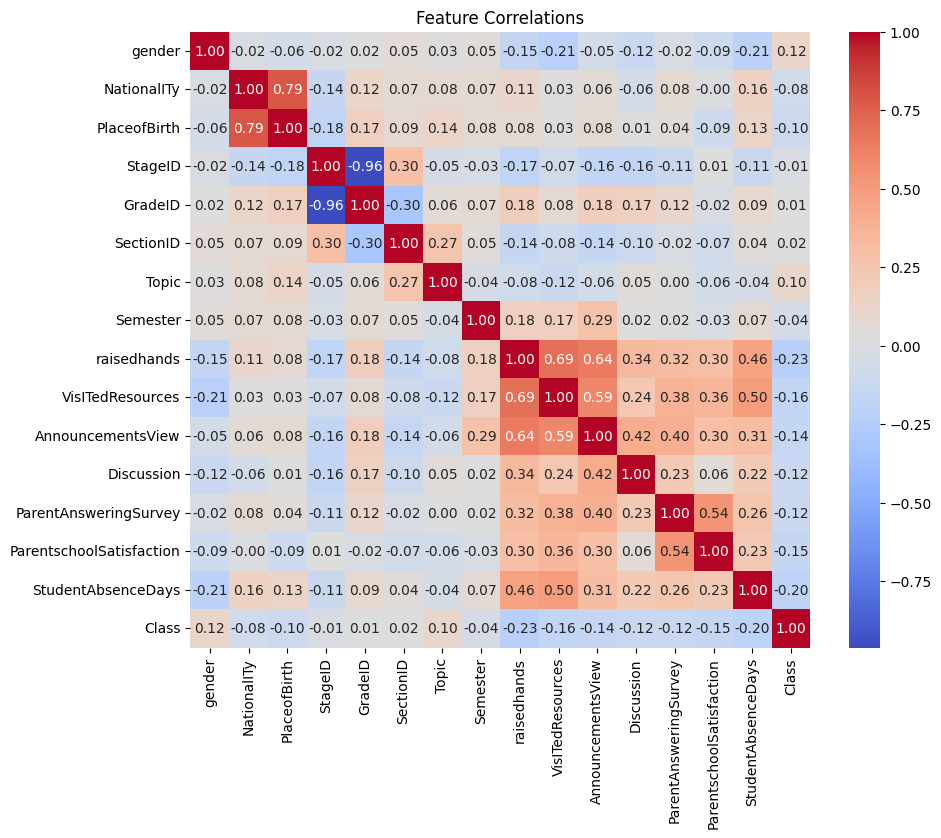

In [6]:
# numeric columns only for correlation heatmap
numeric_data = data.select_dtypes(include='number')

#  correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\3907931219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, order=['Low', 'Medium', 'High'], palette='Set1')


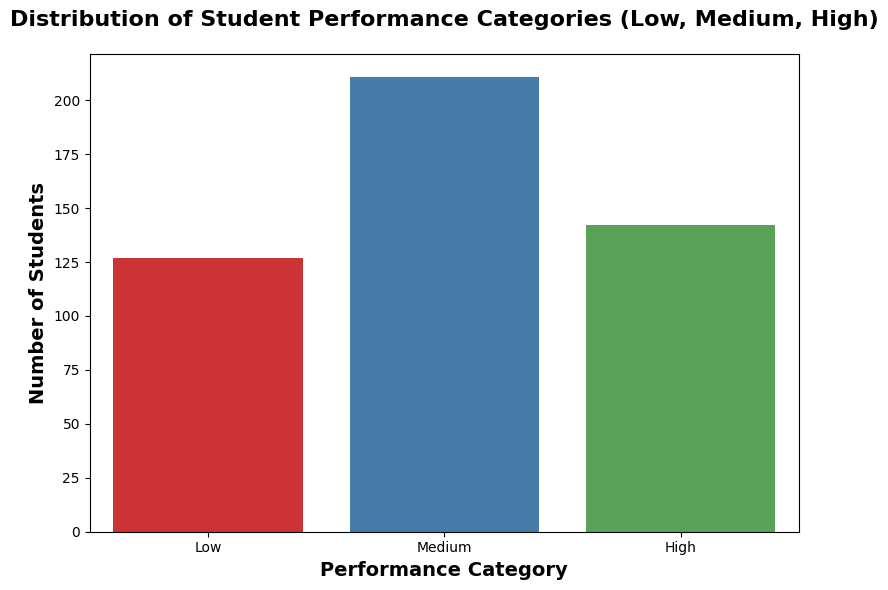

In [7]:
data['Class'] = data['Class'].map({1: 'Low', 2: 'Medium', 0: 'High'})

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, order=['Low', 'Medium', 'High'], palette='Set1')

plt.title("Distribution of Student Performance Categories (Low, Medium, High)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Performance Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of Students", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [8]:
# Classification with Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# predictions and evaluating accuracy
y_pred = classifier.predict(X_test)
classification_accuracy = accuracy_score(y_test, y_pred)
classification_report_data = classification_report(y_test, y_pred)
print("Decision Tree Accuracy:", classification_accuracy)

Decision Tree Accuracy: 0.6458333333333334


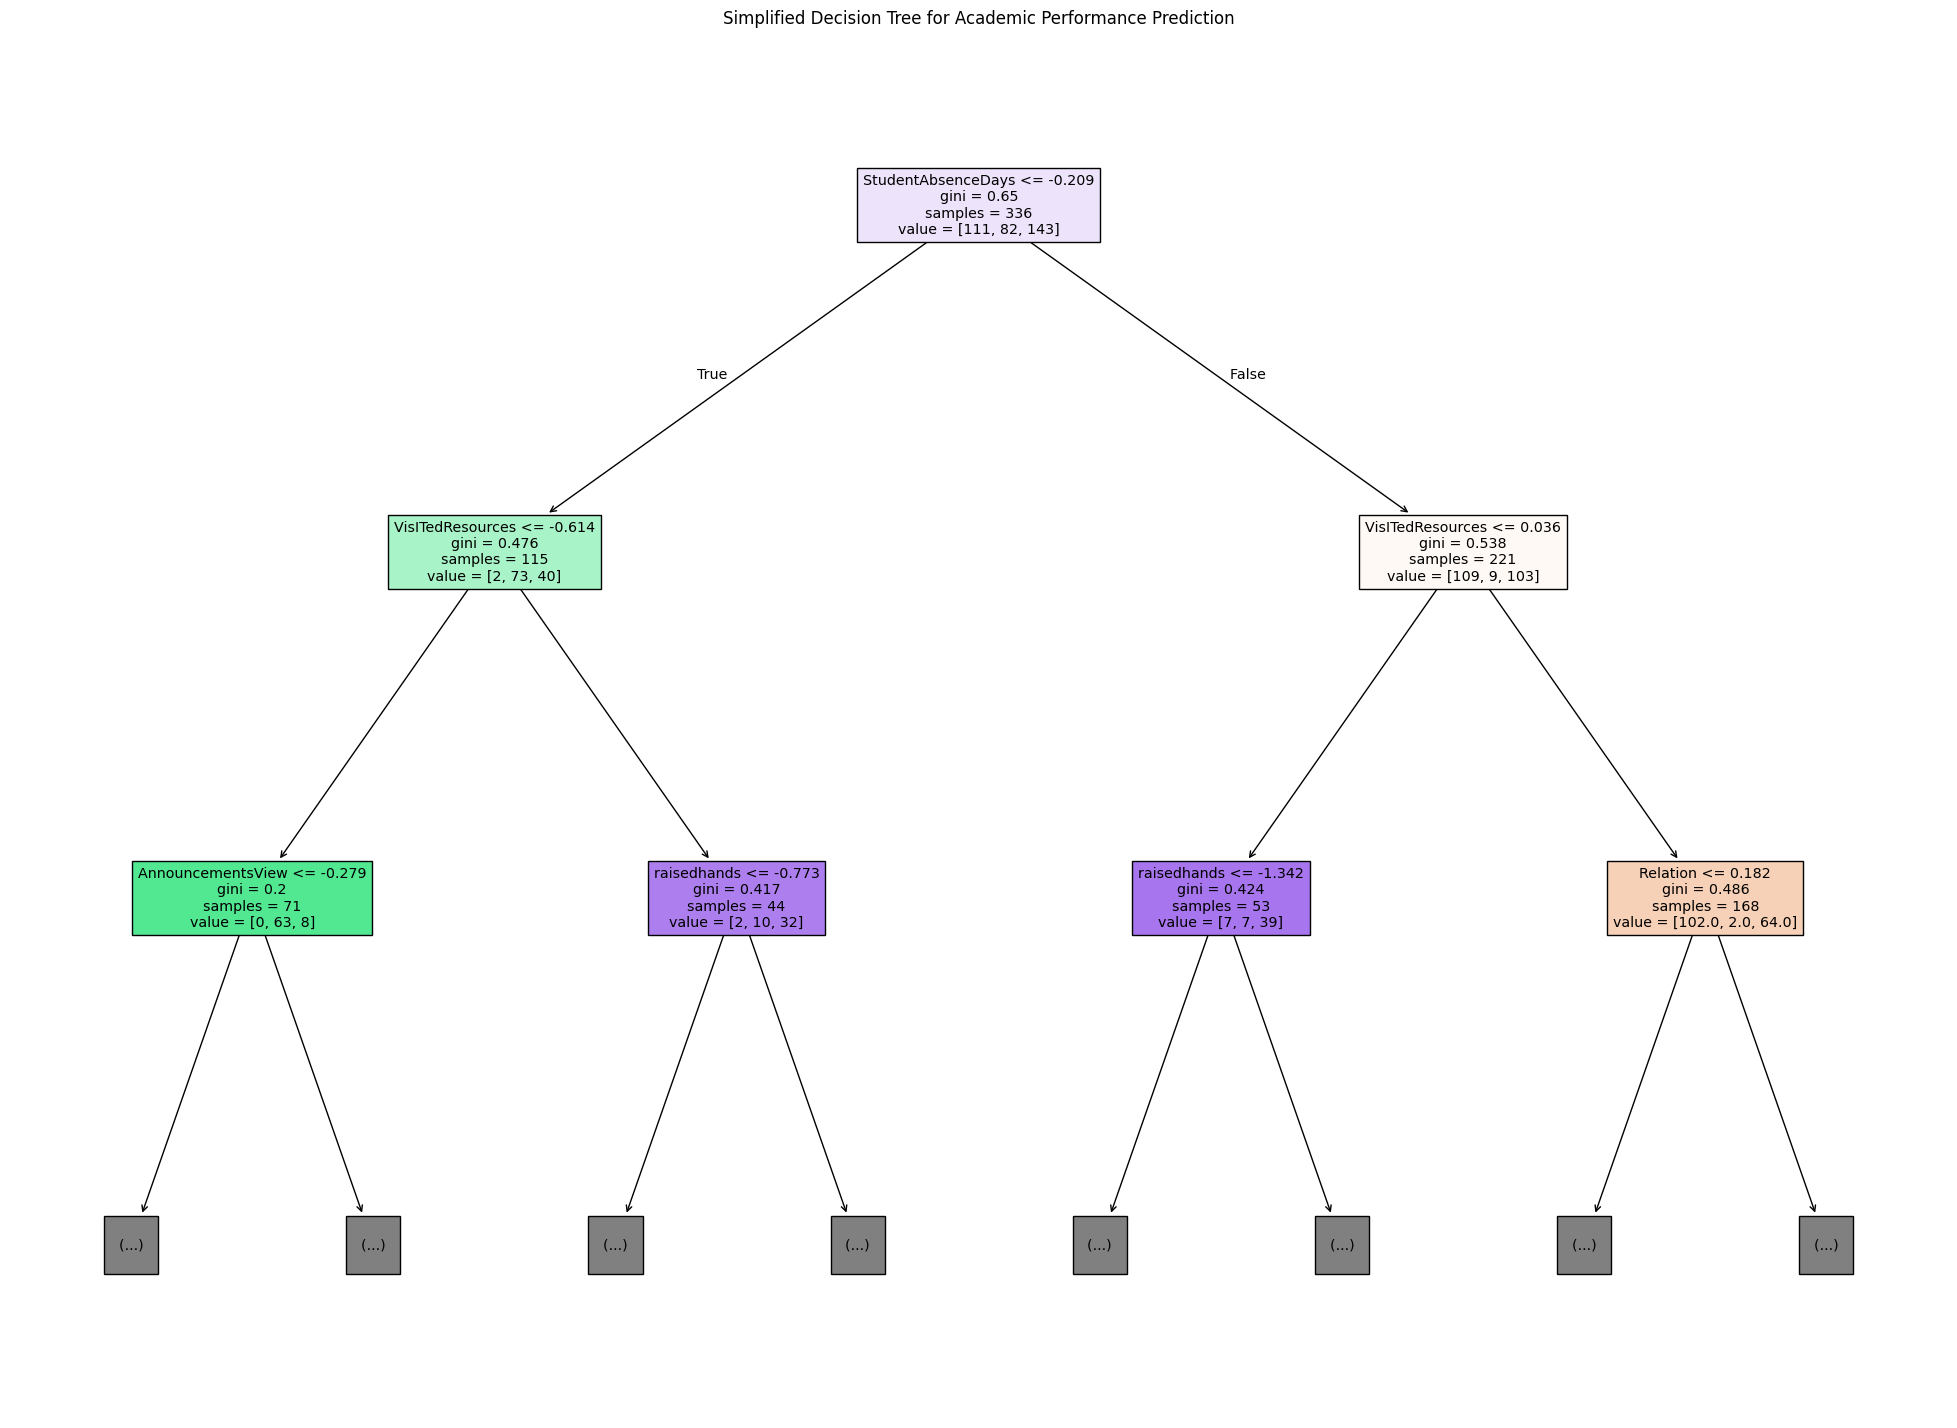

In [9]:
# Plotting the decision tree
plt.figure(figsize=(25, 18))
plot_tree(classifier, filled=True, feature_names=X.columns, max_depth=2)
plt.title("Simplified Decision Tree for Academic Performance Prediction")
plt.show()

In [10]:
# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions with the Random Forest model
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8055555555555556


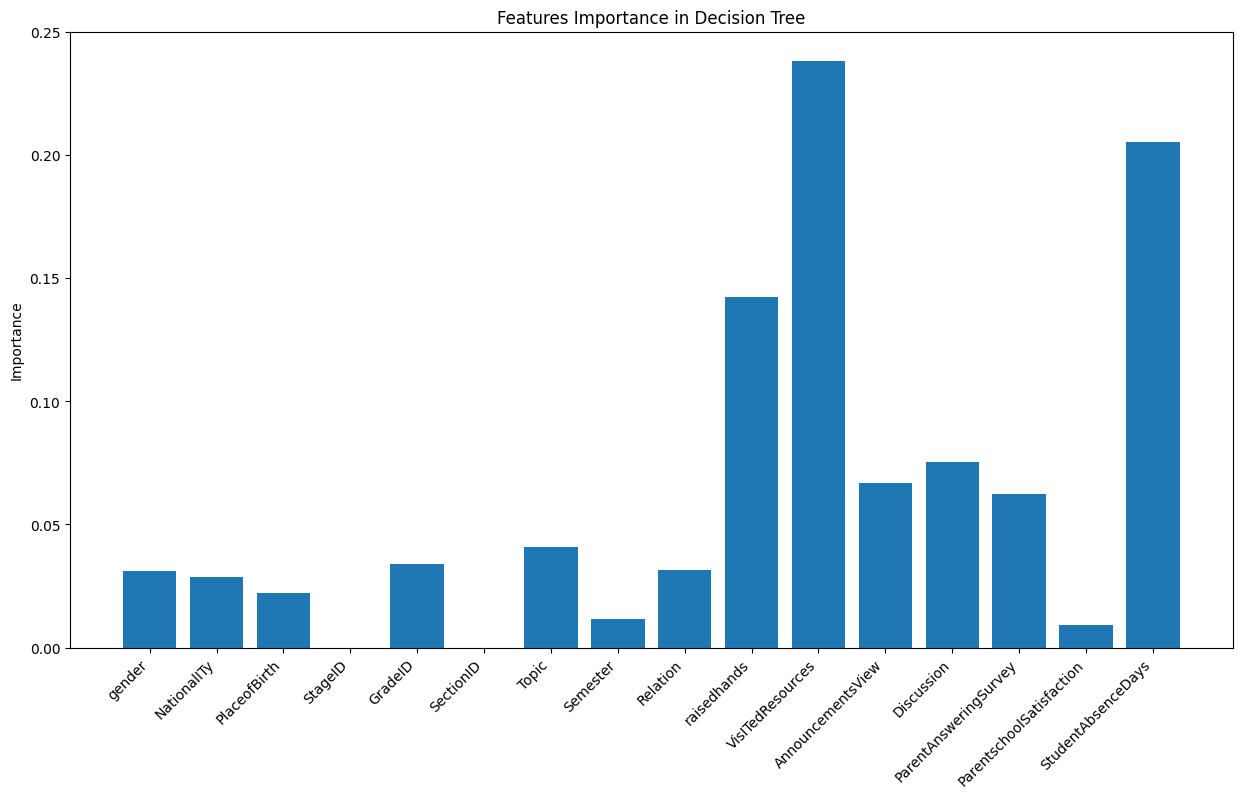

In [11]:
importance = classifier.feature_importances_

# Plotting feature importances for Decision Tree
plt.figure(figsize=(15, 8))
plt.bar(X.columns, importance)
plt.xticks(rotation=45, ha='right')  
plt.title("Features Importance in Decision Tree")
plt.ylabel("Importance")

plt.show()

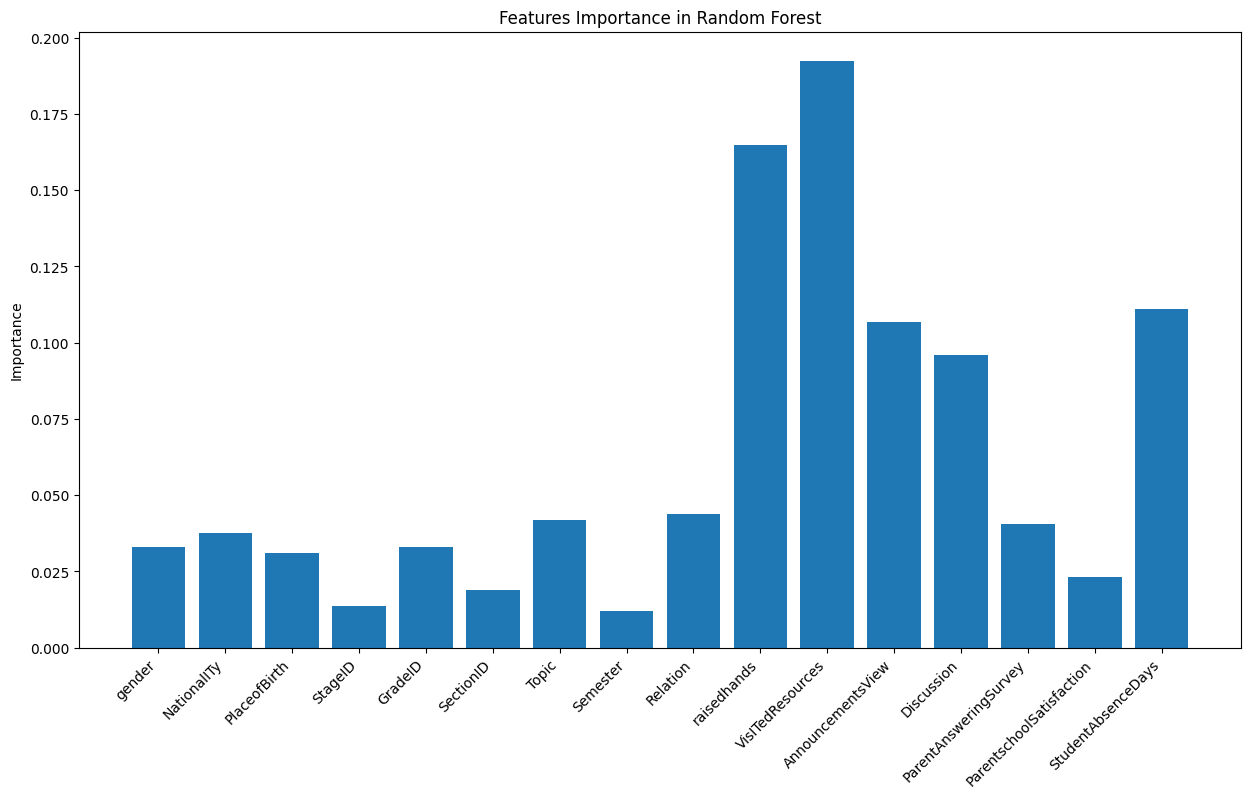

In [12]:
rf_importance = rf_classifier.feature_importances_

# Plotting feature importances for Random Forest
plt.figure(figsize=(15, 8))
plt.bar(X.columns, rf_importance)
plt.xticks(rotation=45, ha='right')  # Rotate feature names for readability
plt.title("Features Importance in Random Forest")
plt.ylabel("Importance")
plt.show()

In [13]:
# Decision Tree Accuracy
print("Decision Tree Accuracy:", classification_accuracy)

# Random Forest Accuracy
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.6458333333333334
Random Forest Accuracy: 0.8055555555555556


In [14]:
# Classification report for Decision Tree
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy:", classification_accuracy)




# Classification report for Random Forest
print("\n\nRandom Forest Classification Report:\n")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        31
           1       0.70      0.71      0.70        45
           2       0.62      0.66      0.64        68

    accuracy                           0.65       144
   macro avg       0.65      0.63      0.64       144
weighted avg       0.65      0.65      0.64       144

Decision Tree Accuracy: 0.6458333333333334


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.87      0.87      0.87        45
           2       0.78      0.82      0.80        68

    accuracy                           0.81       144
   macro avg       0.81      0.79      0.80       144
weighted avg       0.81      0.81      0.80       144

Random Forest Accuracy: 0.8055555555555556


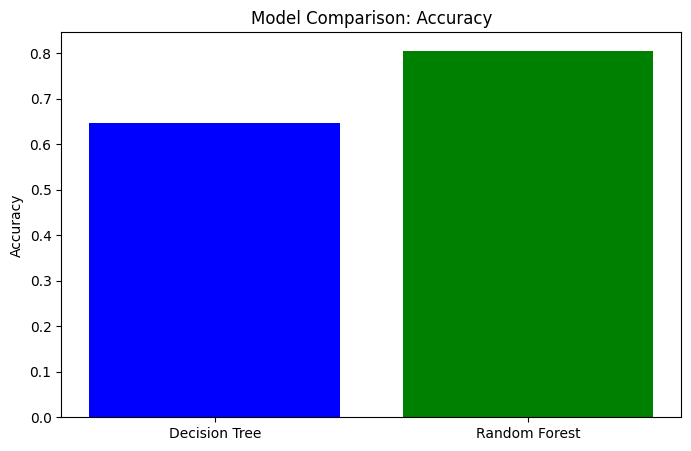

In [15]:
# Bar plot for comparison of model accuracies
plt.figure(figsize=(8, 5))
models = ['Decision Tree', 'Random Forest']
accuracies = [classification_accuracy, rf_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.show()


In [16]:
feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance (highest first)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 16
top_features = importance_df.head(top_n)

print(f"Factors influencing academic performance (Most important to least important):\n")
for index, row in top_features.iterrows():
    print(f"- {row['Feature']} (Importance: {row['Importance']:.4f})")

Factors influencing academic performance (Most important to least important):

- VisITedResources (Importance: 0.1924)
- raisedhands (Importance: 0.1649)
- StudentAbsenceDays (Importance: 0.1109)
- AnnouncementsView (Importance: 0.1068)
- Discussion (Importance: 0.0958)
- Relation (Importance: 0.0439)
- Topic (Importance: 0.0419)
- ParentAnsweringSurvey (Importance: 0.0405)
- NationalITy (Importance: 0.0377)
- GradeID (Importance: 0.0331)
- gender (Importance: 0.0330)
- PlaceofBirth (Importance: 0.0311)
- ParentschoolSatisfaction (Importance: 0.0233)
- SectionID (Importance: 0.0190)
- StageID (Importance: 0.0136)
- Semester (Importance: 0.0120)


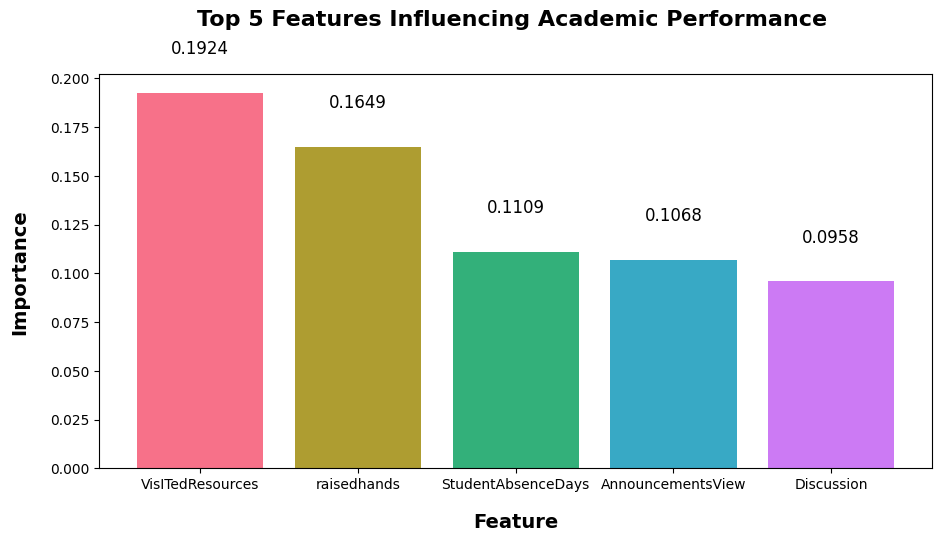

In [17]:
# Plotting the top 5 features and their importance
top_5_features = top_features.head(5)  

plt.figure(figsize=(12, 8))  

bars = plt.bar(top_5_features['Feature'], top_5_features['Importance'], color=sns.color_palette("husl", len(top_5_features)))

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.4f}',
             ha='center', fontsize=12, color='black')

plt.title("Top 5 Features Influencing Academic Performance ", fontsize=16, fontweight='bold', pad=35)  # Added pad for gap
plt.xlabel("Feature", fontsize=14 , fontweight='bold', labelpad = 15)
plt.ylabel("Importance", fontsize=14 , fontweight='bold', labelpad = 15)
plt.xticks( fontsize=10)  
plt.yticks(fontsize=10)

plt.tight_layout(pad=10.0)  

plt.show()

-------

-----------------

# SVM: Is there a specific attendance threshold where a student can be classified as high-performing or low-performing?

Accuracy: 75.69%


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


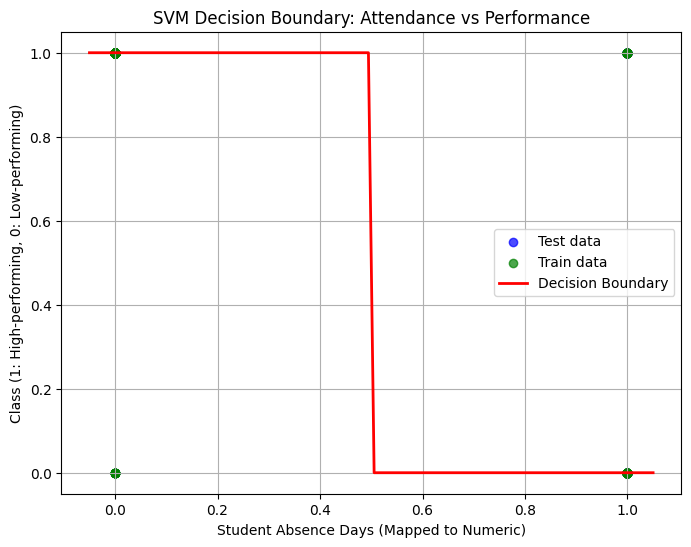

Decision Boundary (Threshold for Attendance): 0.5
SVM Accuracy: 0.7569444444444444


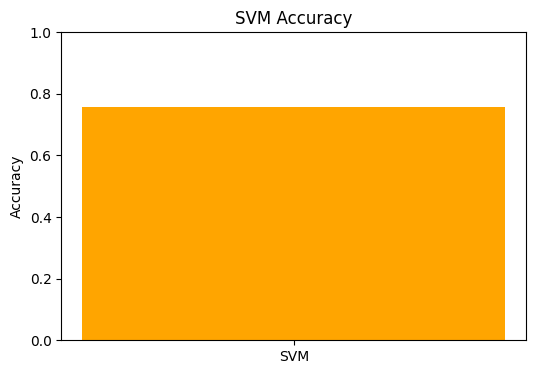

In [18]:
data = pd.read_csv('xAPI-Edu-Data.csv')

# 'M' = 1 (high-performing) and 'L' = 0 (low-performing)
data['Class'] = data['Class'].map({'M': 1, 'L': 0})

attendance_mapping = {
    'Under-7': 0,  #  'Under-7' to 0
    'Above-7': 1   #  'Above-7' to 1
}
data['StudentAbsenceDays'] = data['StudentAbsenceDays'].map(attendance_mapping)

X = data[['StudentAbsenceDays']]  
y = data['Class']  # Target: Performance (high/low)

imputer = SimpleImputer(strategy='most_frequent')  # Impute using the most frequent value
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions and evaluating
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizing the decision boundary with respect to 'StudentAbsenceDays'
plt.figure(figsize=(8, 6))

# Plotting the decision boundary 
plt.scatter(X_test, y_test, color='blue', label='Test data', alpha=0.7)  
plt.scatter(X_train, y_train, color='green', label='Train data', alpha=0.7) 

# Plot decision boundary (this is the threshold where the SVM makes the classification)
xmin, xmax = plt.xlim()
x_values = np.linspace(xmin, xmax, 100).reshape(-1, 1) 
y_values = svm_model.predict(x_values)  

plt.plot(x_values, y_values, color='red', label='Decision Boundary', linewidth=2)  

plt.xlabel('Student Absence Days (Mapped to Numeric)')
plt.ylabel('Class (1: High-performing, 0: Low-performing)')
plt.title('SVM Decision Boundary: Attendance vs Performance')

plt.legend()
plt.grid(True)
plt.show()

# threshold for attendance 
decision_boundary = -svm_model.intercept_ / svm_model.coef_[0]
print(f'Decision Boundary (Threshold for Attendance): {decision_boundary[0]}')

# SVM Accuracy Calculation
accuracy_svm = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy_svm)

# results plotted
plt.figure(figsize=(6, 4))

# accuracy plotted
plt.bar(['SVM'], [accuracy_svm], color='orange')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')

plt.show()


# The SVM model predicts that students with more absences (Above-7) are classified as high-performing (1), while students with fewer absences (Under-7) are classified as low-performing (0).! The decision boundary occurs at 7 absences, meaning the model classifies students with fewer than 7 absences as low-performing, and those with 7 or more absences as high-performing. The model achieves an accuracy of 75.6% in making these predictions.

--------------------------------

# KNN: "How do student attendance and participation correlate with their likelihood of being categorized as high-performing or low-performing?"

KNN Accuracy with k=5: 91.67%


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


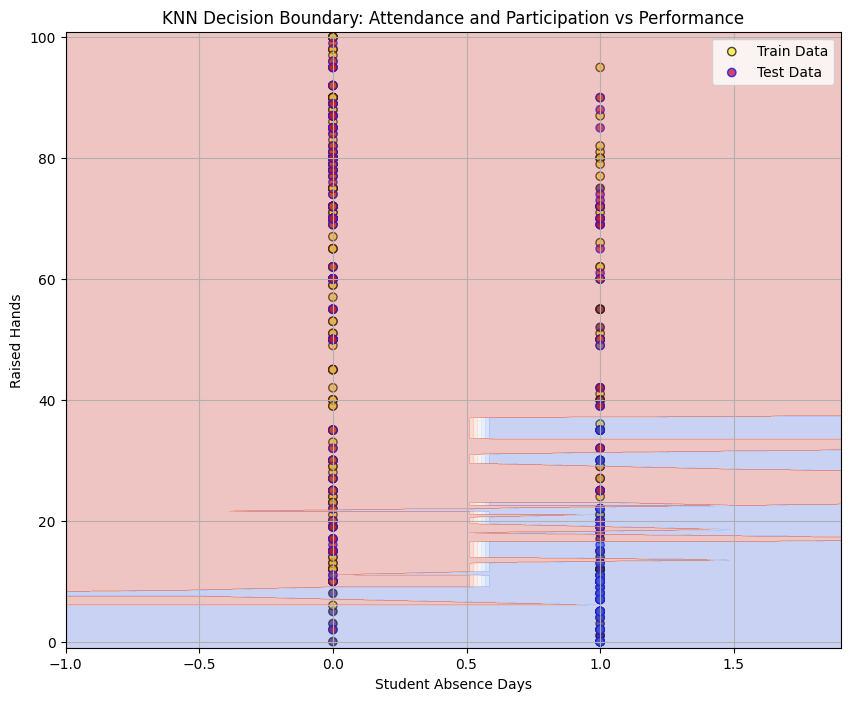

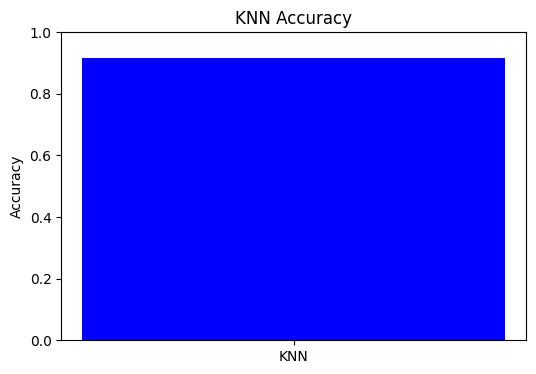

In [19]:
# Data Preparation with Two Features
X = data[['StudentAbsenceDays', 'raisedhands']] 
y = data['Class']  # Target: Performance (high/low)

imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN model
k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# predictions
y_pred = knn_model.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy with k={k}: {accuracy_knn * 100:.2f}%')

# Visualizing decision boundary for two features
plt.figure(figsize=(10, 8))

# training data points plotted
plt.scatter(
    X_train['StudentAbsenceDays'], X_train['raisedhands'], 
    c=y_train, cmap='viridis', edgecolor='k', label='Train Data', alpha=0.7
)

# test data points plotted
plt.scatter(
    X_test['StudentAbsenceDays'], X_test['raisedhands'], 
    c=y_test, cmap='coolwarm', edgecolor='b', label='Test Data', alpha=0.7
)

# meshgrid for the decision boundary
x_min, x_max = X['StudentAbsenceDays'].min() - 1, X['StudentAbsenceDays'].max() + 1
y_min, y_max = X['raisedhands'].min() - 1, X['raisedhands'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting over the grid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# decision boundary plotted
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Student Absence Days')
plt.ylabel('Raised Hands')
plt.title('KNN Decision Boundary: Attendance and Participation vs Performance')
plt.legend()
plt.grid(True)
plt.show()


# accuracy of KNN
accuracy_knn = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.bar(['KNN'], [accuracy_knn], color='blue')
plt.ylim(0, 1)  
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()

-----------------------------

# Naive Bayes: "What is the probability that a student will be high-performing or low-performing, given their attendance ?"

Naive Bayes Accuracy: 89.17%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.84        34
         1.0       0.99      0.86      0.92        86

    accuracy                           0.89       120
   macro avg       0.86      0.92      0.88       120
weighted avg       0.91      0.89      0.90       120



C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


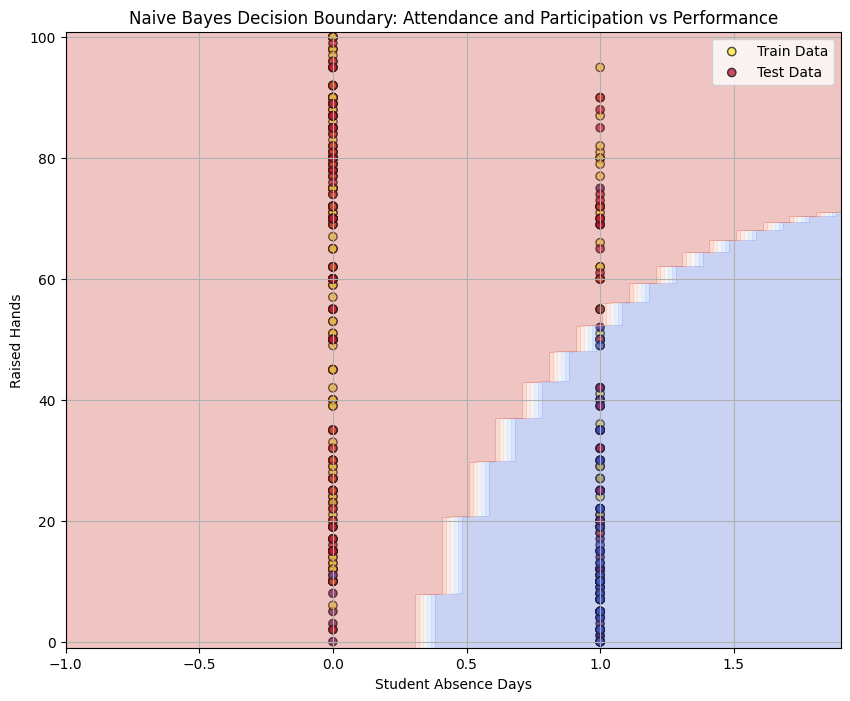

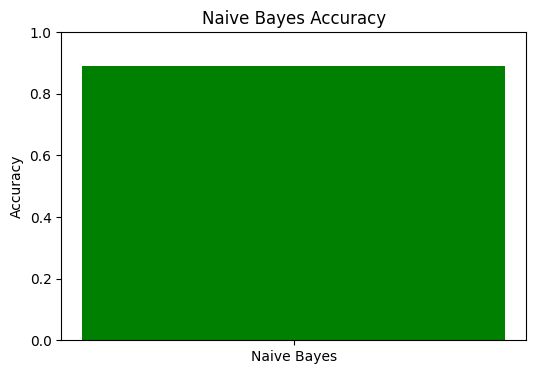

In [20]:
# Data Preparation
X = data[['StudentAbsenceDays', 'raisedhands']]  
y = data['Class']  

imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predictions
y_pred = nb_model.predict(X_test)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision boundary for two features
plt.figure(figsize=(10, 8))

# training data points plotted
plt.scatter(
    X_train['StudentAbsenceDays'], X_train['raisedhands'], 
    c=y_train, cmap='viridis', edgecolor='k', label='Train Data', alpha=0.7
)

# test data points plotted
plt.scatter(
    X_test['StudentAbsenceDays'], X_test['raisedhands'], 
    c=y_test, cmap='coolwarm', edgecolor='k', label='Test Data', alpha=0.7
)

# meshgrid for the decision boundary
x_min, x_max = X['StudentAbsenceDays'].min() - 1, X['StudentAbsenceDays'].max() + 1
y_min, y_max = X['raisedhands'].min() - 1, X['raisedhands'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting over the grid
Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# decision boundary plotted
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Student Absence Days')
plt.ylabel('Raised Hands')
plt.title('Naive Bayes Decision Boundary: Attendance and Participation vs Performance')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Naive Bayes'], [accuracy_nb], color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()


------------------

# Gradient Boosting: "Can the level of student absenteeism predict their likelihood of passing or failing a course?"  


Gradient Boosting Model Accuracy: 0.7569444444444444
Gradient Boosting Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.96      0.71        45
         1.0       0.97      0.67      0.79        99

    accuracy                           0.76       144
   macro avg       0.77      0.81      0.75       144
weighted avg       0.84      0.76      0.77       144



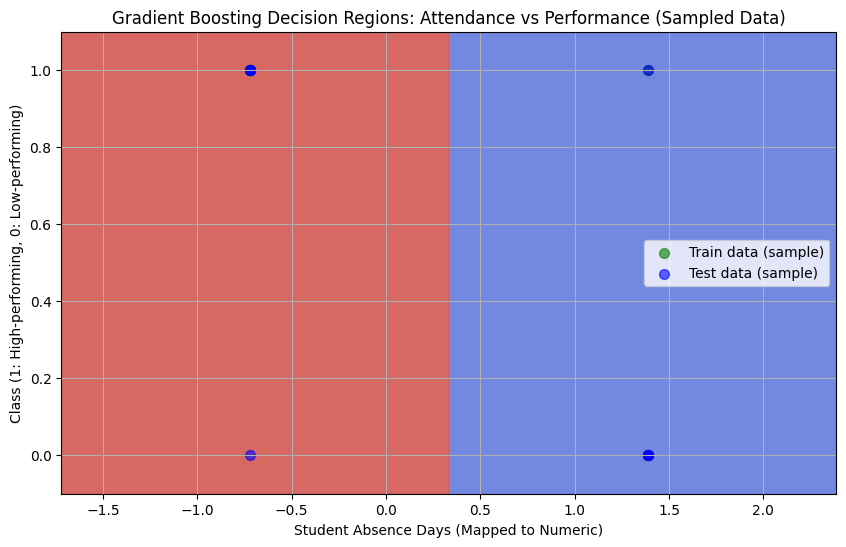

In [21]:
data = pd.read_csv('xAPI-Edu-Data.csv')

data['Class'] = data['Class'].map({'M': 1, 'L': 0})

attendance_mapping = {
    'Under-7': 0,  # Map 'Under-7' to 0
    'Above-7': 1   # Map 'Above-7' to 1
}

data['StudentAbsenceDays'] = data['StudentAbsenceDays'].map(attendance_mapping)

X = data[['StudentAbsenceDays']]  
y = data['Class']  # Target: Performance (high/low)

imputer = SimpleImputer(strategy='most_frequent')  
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training
gb_model.fit(X_train_scaled, y_train)

# predictions and evaluation
y_pred_gb = gb_model.predict(X_test_scaled)

# accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy:", gb_accuracy)

# Classification report
print("Gradient Boosting Model Classification Report:\n", classification_report(y_test, y_pred_gb))

sample_size = 10
train_sample_indices = random.sample(range(len(X_train_scaled)), sample_size)
test_sample_indices = random.sample(range(len(X_test_scaled)), sample_size)

# Extracting sample data points
X_train_sample = X_train_scaled[train_sample_indices]
y_train_sample = y_train[train_sample_indices]
X_test_sample = X_test_scaled[test_sample_indices]
y_test_sample = y_test[test_sample_indices]

# Visualizion of decision boundaries with the sample data
x_min, x_max = X_train_scaled.min() - 1, X_train_scaled.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(-0.1, 1.1, 500))  

# Reshaping the mesh grid to match the input shape, since the model expects 2D input
xx_reshaped = xx.reshape(-1, 1)  

Z = gb_model.predict(xx_reshaped)

# Reshaping of the predicted values to match the mesh grid
Z = Z.reshape(xx.shape)

# Plotting the regions where the model predicts each class
plt.figure(figsize=(10, 6))  
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm) 

plt.scatter(X_train_sample, y_train_sample, color='green', label='Train data (sample)', alpha=0.6, s=50)

plt.scatter(X_test_sample, y_test_sample, color='blue', label='Test data (sample)', alpha=0.6, s=50)

plt.xlabel('Student Absence Days (Mapped to Numeric)')
plt.ylabel('Class (1: High-performing, 0: Low-performing)')
plt.title('Gradient Boosting Decision Regions: Attendance vs Performance (Sampled Data)')

plt.legend()
plt.grid(True)
plt.show()


----------

# ANN: "What impact does parental influence ("ParentAnsweringSurvey" or "ParentschoolSatisfaction") has on student performance?" 

Accuracy: 0.60
Classification Report:
{'H': {'precision': 0.45714285714285713, 'recall': 0.7272727272727273, 'f1-score': 0.5614035087719298, 'support': 22.0}, 'L': {'precision': 0.7142857142857143, 'recall': 0.7692307692307693, 'f1-score': 0.7407407407407407, 'support': 26.0}, 'M': {'precision': 0.6666666666666666, 'recall': 0.4583333333333333, 'f1-score': 0.5432098765432098, 'support': 48.0}, 'accuracy': 0.6041666666666666, 'macro avg': {'precision': 0.6126984126984127, 'recall': 0.6516122766122766, 'f1-score': 0.6151180420186267, 'support': 96.0}, 'weighted avg': {'precision': 0.6315476190476191, 'recall': 0.6041666666666666, 'f1-score': 0.6008771929824561, 'support': 96.0}}


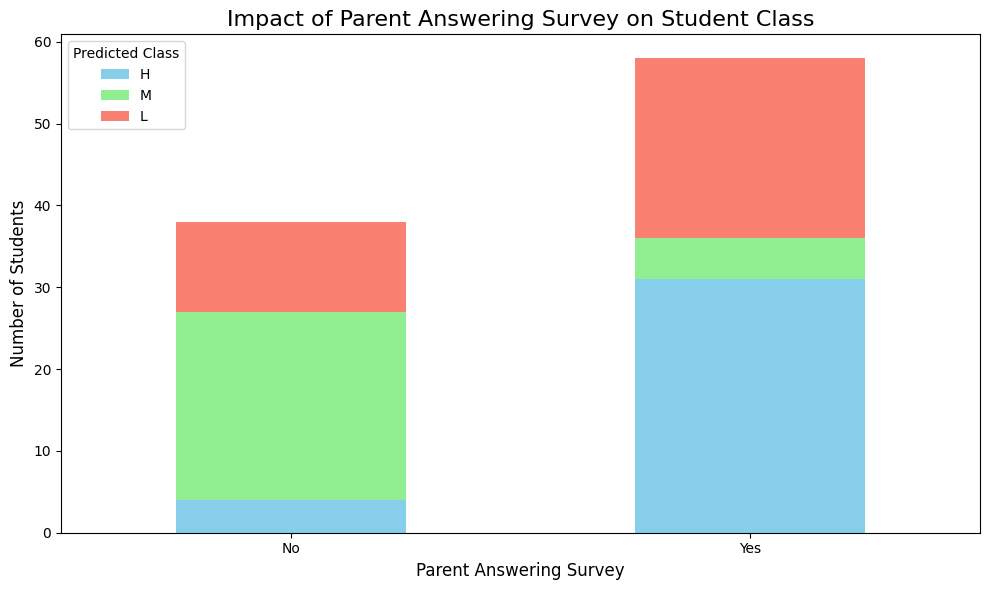

In [22]:
data = pd.read_csv('xAPI-Edu-Data.csv')

# relevant columns for features and target
X = data[['ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'raisedhands', 'VisITedResources', 'AnnouncementsView']]  
y = data['Class']  # Assuming 'Class' is the target for performance

X = X.fillna('Unknown')  #
y = y.fillna('Unknown')  

# column transformer for one-hot encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['ParentAnsweringSurvey', 'ParentschoolSatisfaction'])],
    remainder='passthrough'  # Keep the numerical columns unchanged
)

# Apply one-hot encoding on the features
X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# SMOTE for over-sampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ANN model pipeline with preprocessing
ann_model = Pipeline(steps=[
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42))  # No class_weight here
])

# Train the model on the resampled data
ann_model.fit(X_train_resampled, y_train_resampled)

# Prediction on the test set
y_pred = ann_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(report)

# Combine the features with the predicted class
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
X_test_df['Predicted_Class'] = y_pred



# New column to combine the 'ParentAnsweringSurvey_Yes' and 'ParentAnsweringSurvey_No'
X_test_df['ParentAnsweringSurvey'] = X_test_df.apply(
    lambda row: 'Yes' if row['cat__ParentAnsweringSurvey_Yes'] == 1 else ('No' if row['cat__ParentAnsweringSurvey_No'] == 1 else 'Unknown'),
    axis=1
)

class_counts = X_test_df.groupby(['ParentAnsweringSurvey', 'Predicted_Class']).size().unstack().fillna(0)

# Plotting
ax = class_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Impact of Parent Answering Survey on Student Class', fontsize=16)
plt.xlabel('Parent Answering Survey', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Predicted Class', labels=['H', 'M', 'L'])

plt.tight_layout()
plt.show()

